In [14]:
#hide
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.signal as sg
import numpy as np
from scipy import constants


# Particle in a box 

Within quantum mechanics one of the first models you are taught is the particle in a box model, also known as the infinite potential well. This model describes the motion of a particle that is free to move around a small space that is surrounded by barriers of 'infinite potential' that cannot be crossed. 

This notebook serves as an example on how to solve a couple of example problems in which this model is applied to real chemical species. In these examples the model is used to describe the movement of an electron along a conjugated chain of alternating double and single bonds.

The first example we will consider looks at calculating the energy associated with a transition of an electron from one energy level to another. When solving these problems its best to try and prepare all the variables required before proceeding. The variables to be considered are the length of the 'box' which in this application would be the length of the conjugated chain, which is solved by considering the number of bond lengths and multiplying the average bond length by this number plus an addition 0.5 bond lengths at either end of the chain.

Following this, considering the number of $\pi$ electrons in the chain allows us to determine which levels this transition is occurring between. In the PIAB model the energy levels begin at n = 1 and each level accepts two electrons. The highest level that is occupied will be our highest occupied molecular orbital and the level above that will be the lowest unoccupied molecular orbital and this is where our lowest energy transition will occur.

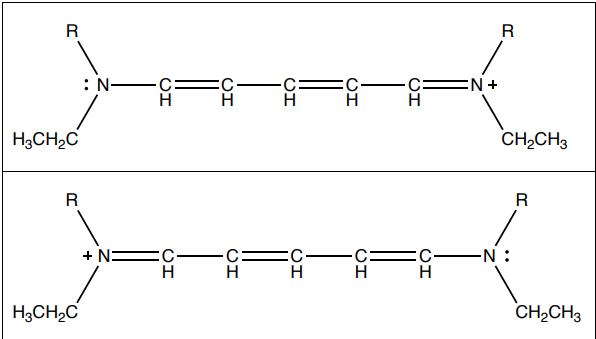


This example has eight $\pi$ electrons and an average bond length of 0.1395 nm. Eight $\pi$ electrons fills the first four levels of energy level diagram and indicates that this is a N = 4 to N = 5 transition. 

The first cell allows us to work out our variables for the problem, the formula for the energy of a particular transition in the particle in a box (PIAB) model is:
$e_n = {n^2 h^2 \over 8 m L^2}$. To solve the problem in fewer steps we can take $n^2$ to be the difference of the squares of the energy levels.

In [9]:
# The variable n refers to the number of pi electrons in our model.
n = 8

#n_level takes our number of pi electrons and divides them by two. In the PIAB model our energy levels start at n = 1 and each level accepts two electrons, thus this express finds the HOMO for us
n_level = n/2
print('n = ' + str(n_level))

#This following expression solves the difference between the n^2 expressions for both the HOMO and the LUMO and gives us the final value to be used in the formula
e_final = (n_level+1)**2 - (n_level)**2
print('n_LUMO^2 - n_HOMO^2 = ' + str(e_final))

n = 4.0
n_LUMO^2 - n_HOMO^2 = 9.0


In [1]:
# Here we can see the same value above calculated in a more traditional way
n_2 = 5**2 - 4**2

# It's always important to remember to convert the length into metres and to account for the correct number of bond lengths required.
L_nm = 0.1395
L_m = L_nm/1e+9
L = L_m*7

# It's always nice to have a sanity check before proceeding with the problem :)
print(n_2, L)

9 9.765e-10


Here, we finally use the formula to find the energy of the transition $e_n = {n^2 \cdot h \over 8 \cdot m \cdot L^2}$. 

In [37]:
e_n = (n_2 * (constants.h**2))/(8*constants.m_e*(L**2))
print(e_n)
e_n_final = e_n * 1e21
print(str(round(e_n_final, 2)) + ' zJ')

5.685812230012028e-19
568.58 zJ


Thanks to the De Broglie relation and the resulting formula $\lambda = {h \cdot c \over E}$. We can calculate the wavelength of light needed to induce this excitation.

In [34]:
Wavelength = (constants.h*constants.c)/e_n
print(Wavelength)
Wavelength_nm = Wavelength*(1e+9)
print(str(round(Wavelength_nm,)) + ' nm')

3.4936888113604247e-07
349 nm


Lets consider another example:


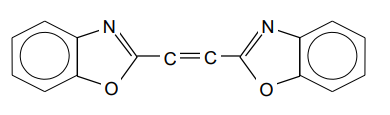


This example is slightly different in that they provide bond lengths for each of the types of bond.


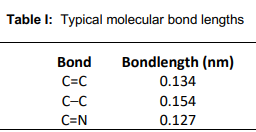

Lets look at the parameters this problem gives us again. 

There are five bond lengths in the conjugated chain between the nitrogen atoms. Let's take the five bond lengths and add one to account for the two half bond lengths that our model requires and then note the six pi electrons present and input these values into the formula.

In [50]:
L_nm = (0.134 * 2) + (2 * 0.154) + (2 * 0.127)
L_m = L_nm / (1e9)
print(str(L_m) + ' m')


8.3e-10 m


In [39]:
# The variable n refers to the number of pi electrons in our model.
n = 6

#n_level takes our number of pi electrons and divides them by two. In the PIAB model our energy levels start at n = 1 and each level accepts two electrons, thus this express finds the HOMO for us
n_level = n/2
print('n = ' + str(n_level))

#This following expression solves the difference between the n^2 expressions for both the HOMO and the LUMO and gives us the final value to be used in the formula
e_final = (n_level+1)**2 - (n_level)**2
print('n_LUMO^2 - n_HOMO^2 = ' + str(e_final))

n = 3.0
n_LUMO^2 - n_HOMO^2 = 7.0


In [51]:
e_n = (e_final * (constants.h**2))/(8*constants.m_e*(L_m**2))
print(e_n)
e_n_final = e_n * 1e21
print(str(round(e_n_final, 2)) + ' zJ')

6.121740719358831e-19
612.17 zJ


In [52]:
Wavelength = (constants.h*constants.c)/e_n
print(Wavelength)
Wavelength_nm = Wavelength*(1e+9)
print(str(round(Wavelength_nm,)) + ' nm')

3.244903611920666e-07
324 nm
